### 準備

In [37]:
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 14


In [38]:
# 必要なデータセット（時系列データ）の読み込み

dataset_path = '../AirPassengers.csv'
df = pd.read_csv(
    dataset_path, 
    index_col='Month',
    parse_dates=True
)

df


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


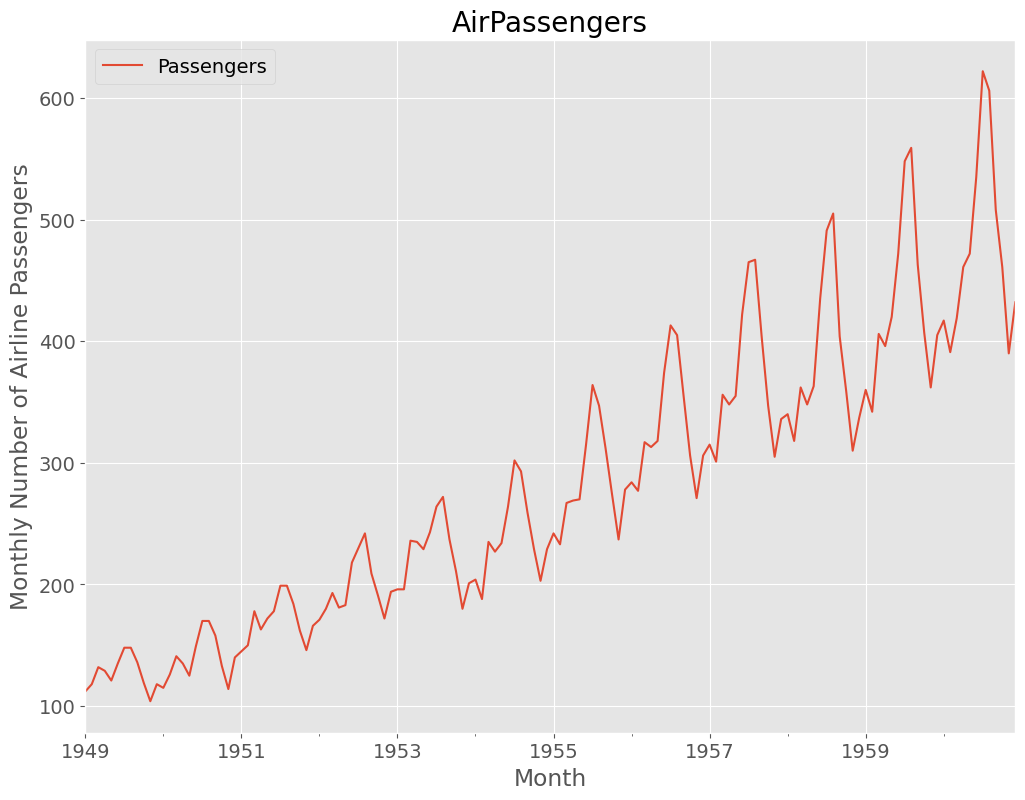

In [39]:
df.plot()
plt.title('AirPassengers')
plt.ylabel('Monthly Number of Airline Passengers')
plt.xlabel('Month')
plt.show()


### 時系列データの変動成分の分解

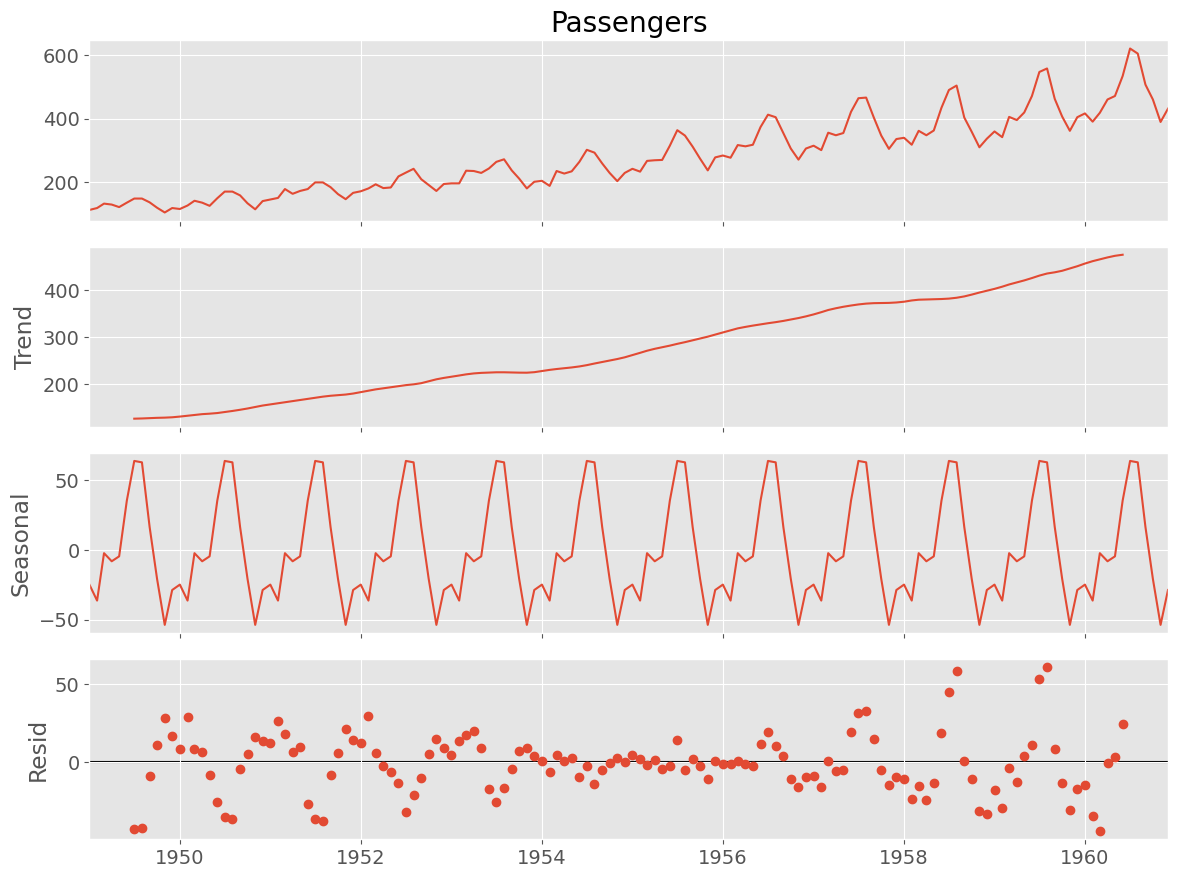

In [40]:
# 移動平均法を利用した分解（加法モデルを仮定）
result = seasonal_decompose(
    df['Passengers'],
    model='additive',
    period=12
)

result.plot()
plt.show()


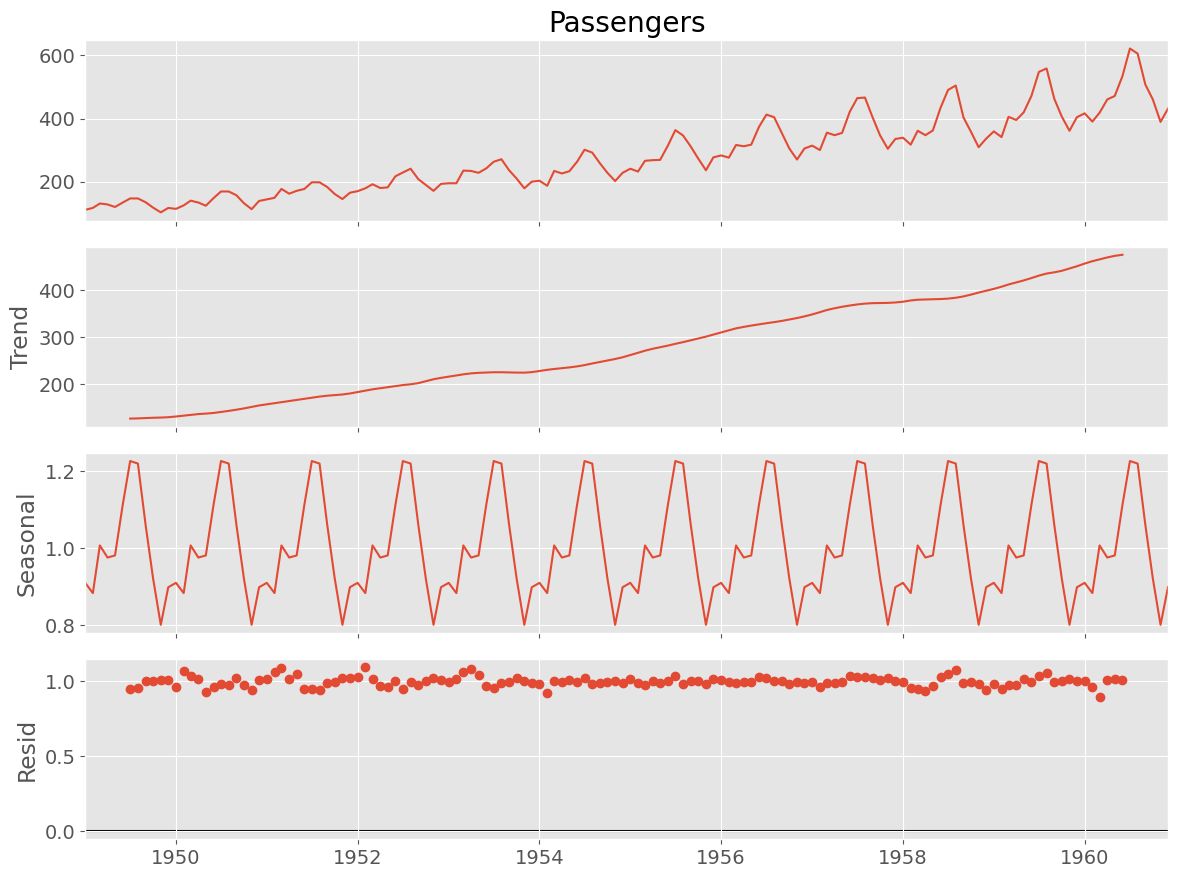

In [41]:
# 移動平均法を利用した分解（乗法モデルを仮定）
result = seasonal_decompose(
    df['Passengers'],
    model='multiplicative',
    period=12
)

result.plot()
plt.show()


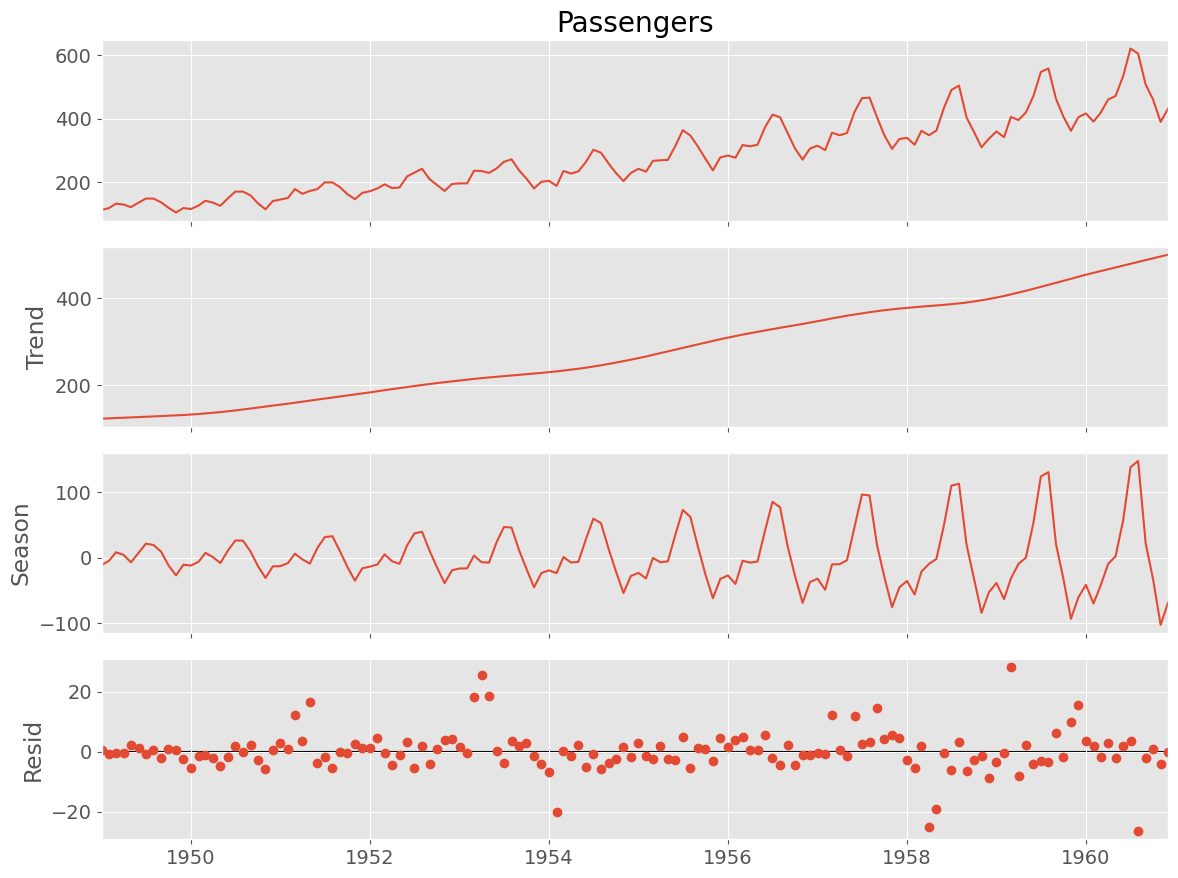

In [42]:
# STL分解（LOESS平滑化を利用した分解）

stl_result = STL(
    df['Passengers'],
    period=12,
    robust=True
).fit()

stl_result.plot()
plt.show()



In [49]:
# 原系列に対するADF検定

# ADF検定
dftest = adfuller(df['Passengers'])

print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical Values:')
for i, j in dftest[4].items():
    print(f'\t{i}: {j}')


ADF Statistic: 0.8153688792060447
p-value: 0.9918802434376409
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


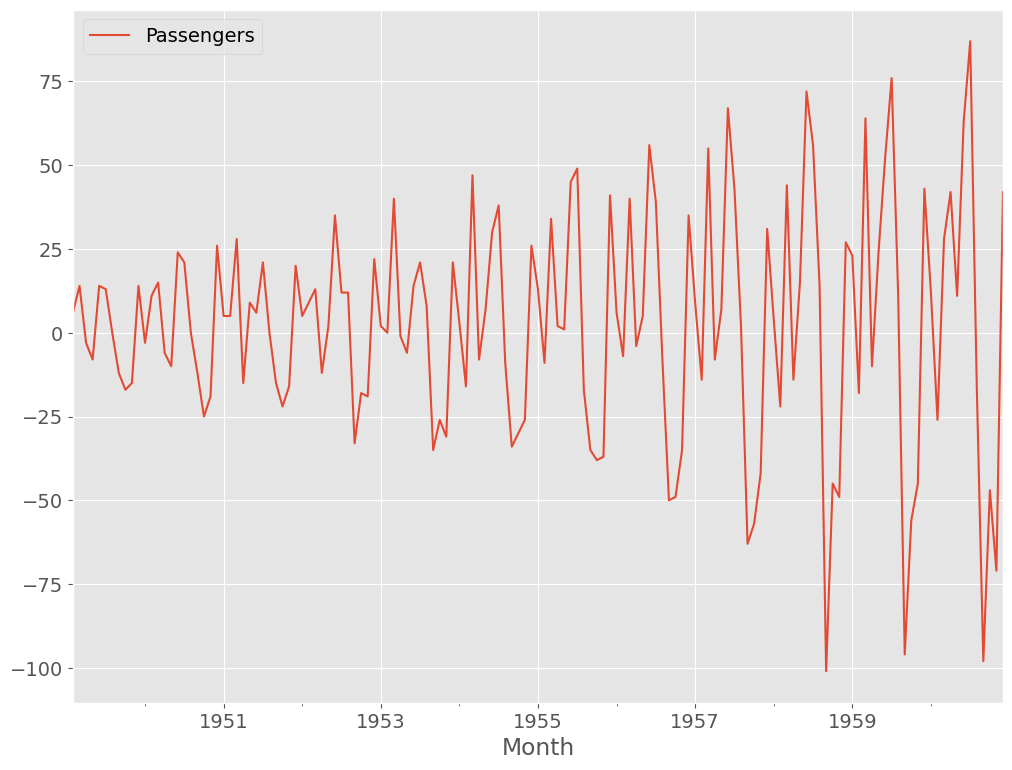

In [53]:
# 原系列の差分系列（1ヶ月）を生成

df_d1 = df.diff(1).dropna()

df_d1.plot()
plt.show()


In [54]:
# 原系列の差分系列（1ヶ月）に対するADF検定

dftest = adfuller(df_d1['Passengers'])

print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical Values:')
for i, j in dftest[4].items():
    print(f'\t{i}: {j}')


ADF Statistic: -2.8292668241699794
p-value: 0.054213290283828236
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


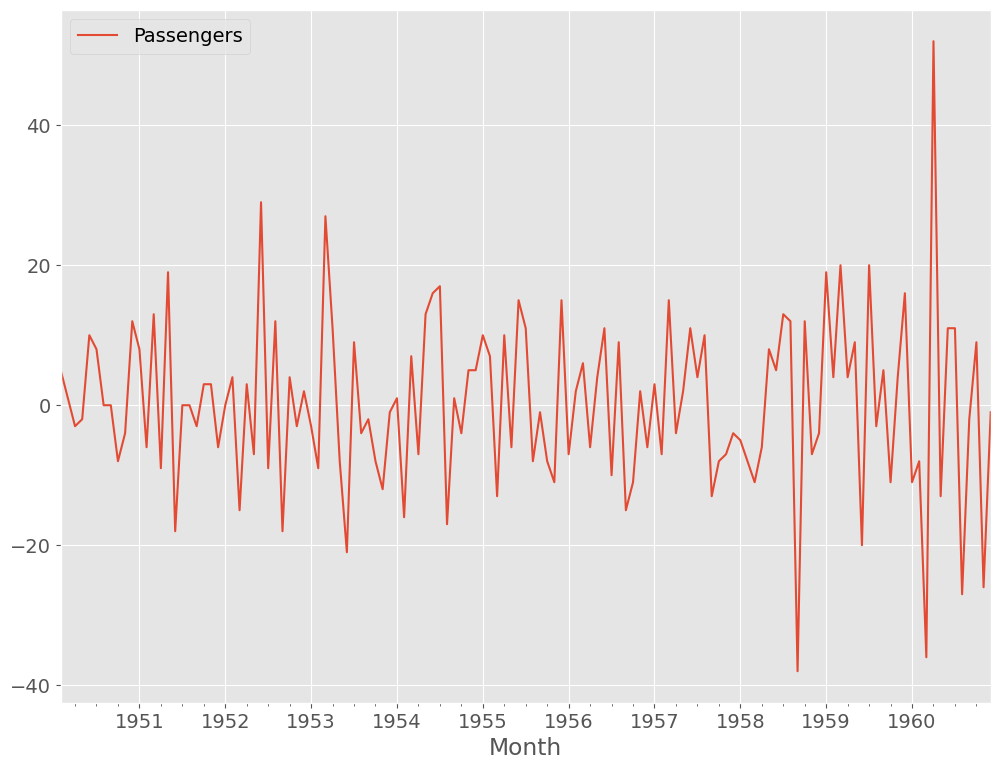

In [55]:
# 原系列の差分系列（1ヶ月）の差分系列（12ヶ月）の生成

df_d1_d12 = df_d1.diff(12).dropna()

df_d1_d12.plot()
plt.show()


In [56]:
# 原系列の差分系列（1ヶ月）の差分系列（12ヶ月）に対するADF検定

dftest = adfuller(df_d1_d12['Passengers'])

print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical Values:')
for i, j in dftest[4].items():
    print(f'\t{i}: {j}')


ADF Statistic: -15.59561808374634
p-value: 1.856511600123444e-28
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


### 自己相関の確認

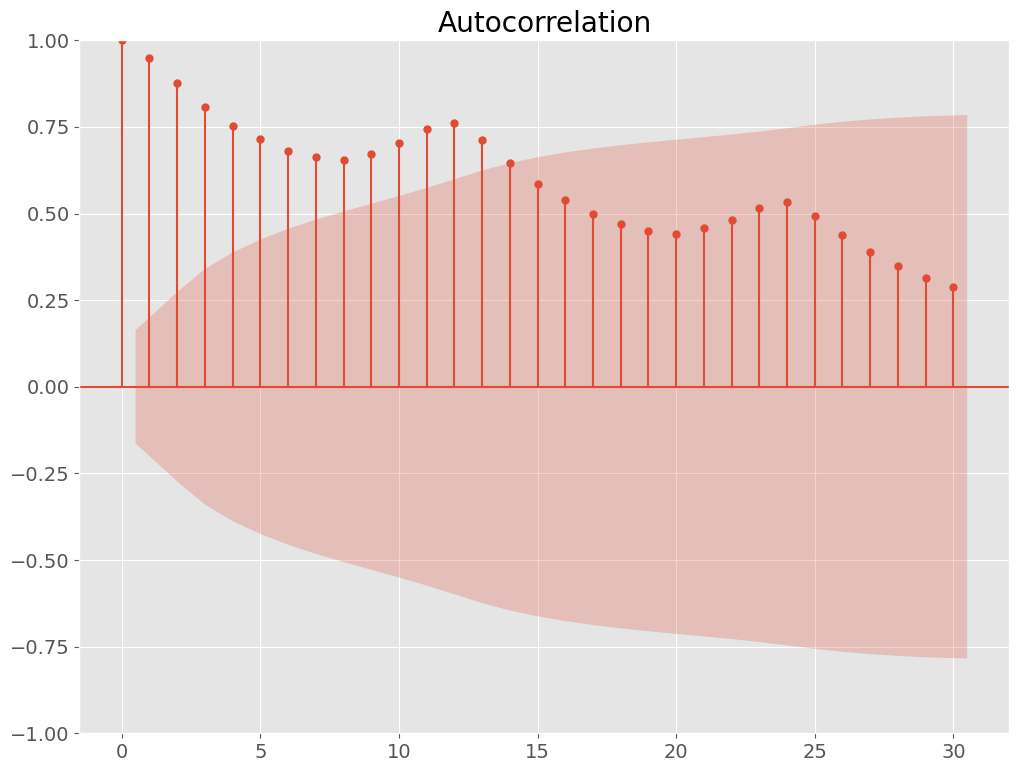

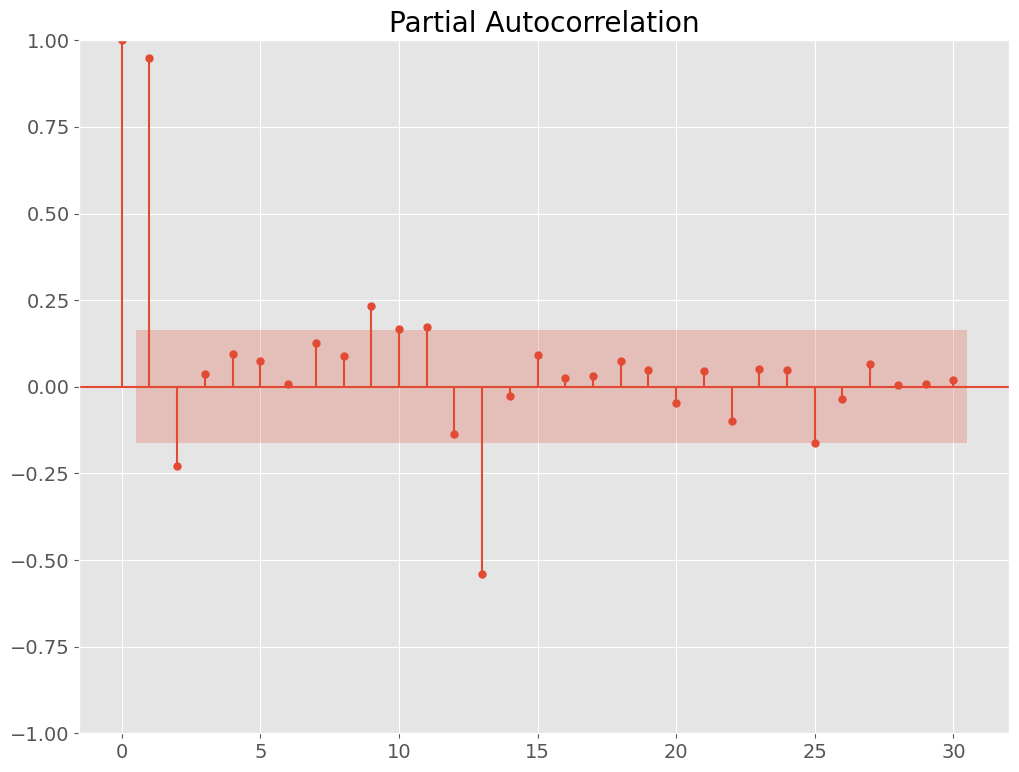

In [59]:
# 原系列の自己相関

acf = plot_acf(df['Passengers'], lags=30)
pacf = plot_pacf(df['Passengers'], lags=30)


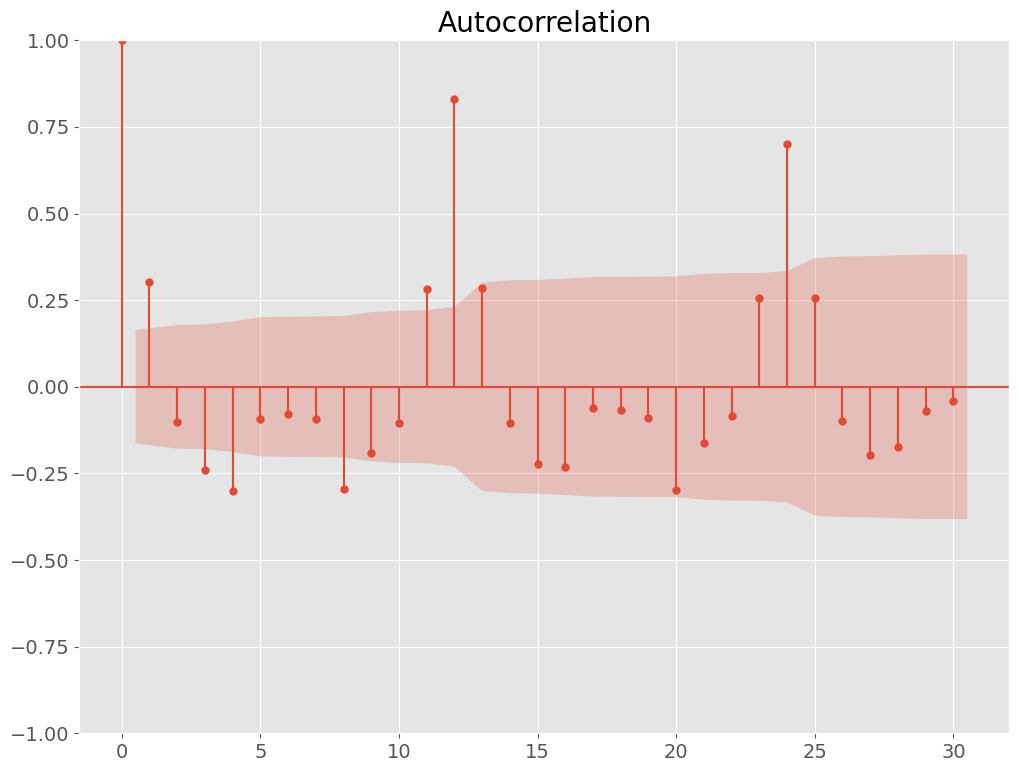

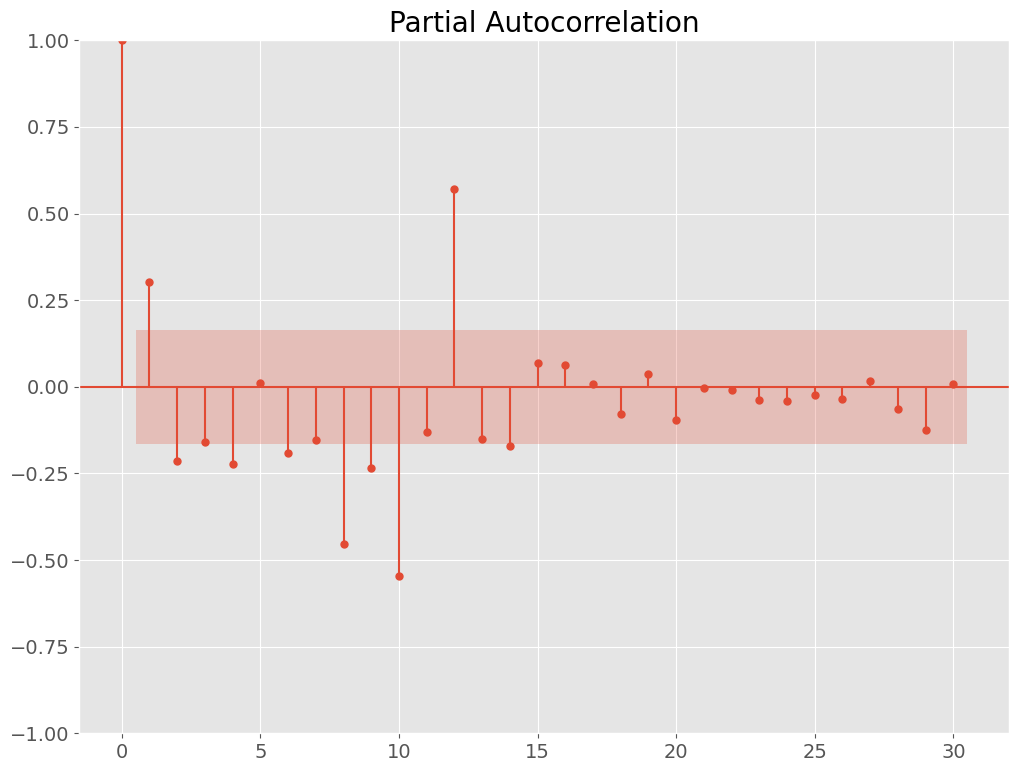

In [60]:
# 原系列の差分系列（1ヶ月前）の自己相関

acf = plot_acf(df_d1['Passengers'], lags=30)
pacf = plot_pacf(df_d1['Passengers'], lags=30)


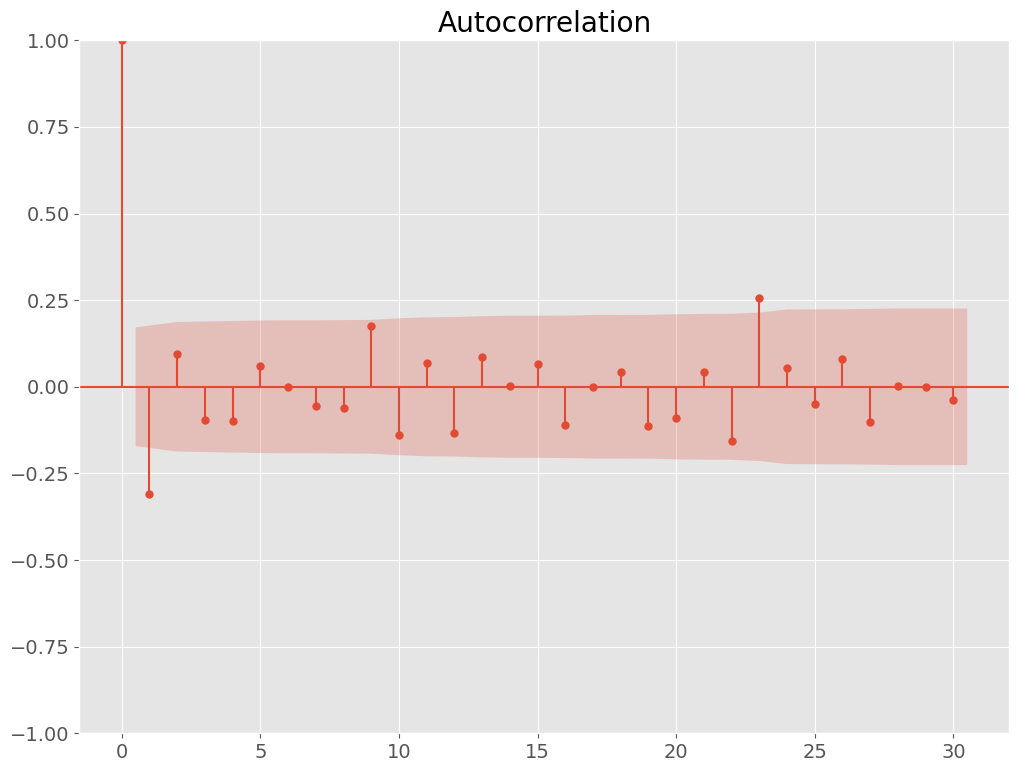

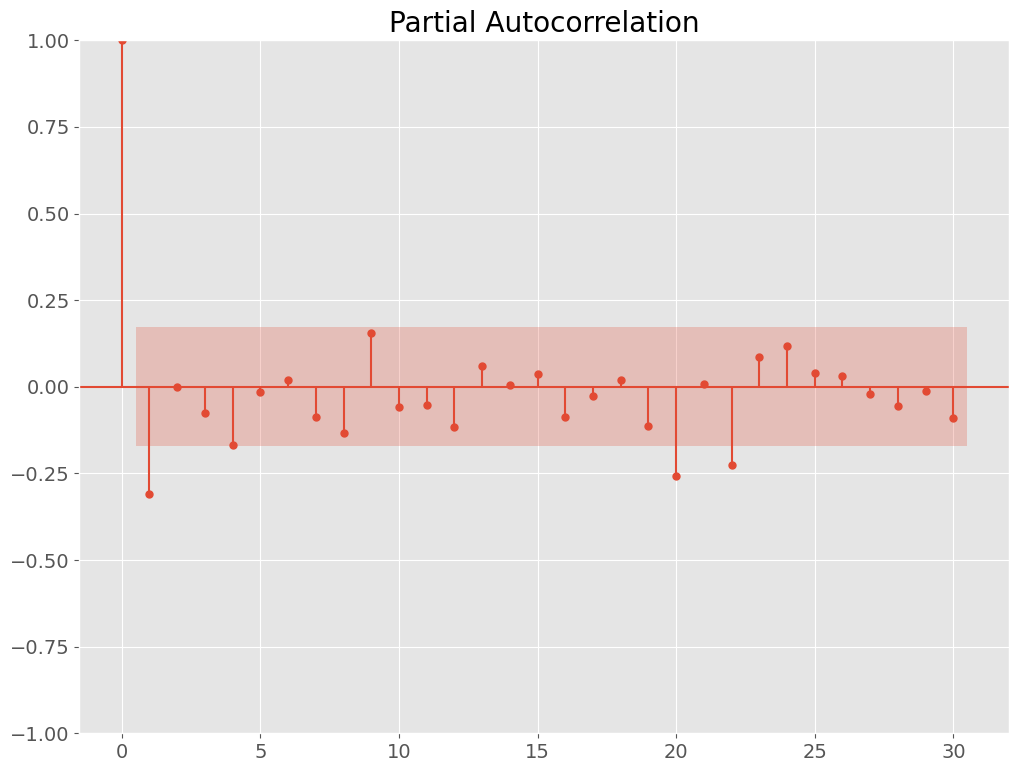

In [61]:
# 原系列の差分系列（1ヶ月前）の差分系列（12ヶ月）の自己相関

acf = plot_acf(df_d1_d12.Passengers, lags=30)   #自己相関
pacf = plot_pacf(df_d1_d12.Passengers, lags=30) #偏自己相関
